## Régression Logistique ##


La régression logistique est un modèle de classification binaire qui estime
la probabilité qu’une observation appartienne à une classe donnée à partir
d’une combinaison linéaire des variables explicatives, transformée par une
fonction sigmoïde.

Ce modèle a été choisi comme premier modèle car il est simple, interprétable
et bien adapté aux problèmes de classification binaire. Il constitue une
baseline pertinente pour comparer les performances de modèles plus complexes.

La régression logistique repose sur l’hypothèse d’une relation linéaire entre
les variables explicatives et le log-odds de la probabilité prédite. Elle est
également sensible à l’échelle des variables, ce qui justifie l’étape de
standardisation réalisée lors du prétraitement.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)

In [6]:
df = pd.read_csv("../data/processed/adult_cleaned.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
X = df.drop("income", axis=1)
y = df["income"].map({"<=50K": 0, ">50K": 1})

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train, X_test = X_train.align(
    X_test,
    join="left",
    axis=1,
    fill_value=0
)

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
log_reg = LogisticRegression(
    max_iter=1000,
    solver="lbfgs"
)

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = log_reg.predict(X_test_scaled)

In [14]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.8526024873330262
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.74      0.60      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



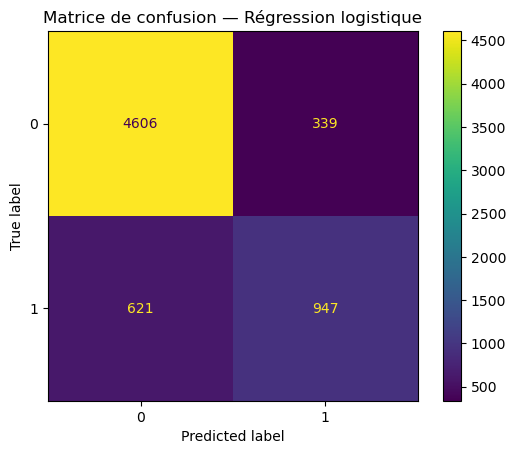

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matrice de confusion — Régression logistique")
plt.show()

In [16]:
coef_df = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": log_reg.coef_[0]
}).sort_values(by="coefficient", ascending=False)

coef_df.head(10)

,feature,coefficient
3,capital.gain,2.324565
29,marital.status_Married-civ-spouse,1.068853
2,education.num,0.564423
5,hours.per.week,0.371419
56,sex_Male,0.359180
0,age,0.316102
36,occupation_Exec-managerial,0.315850
51,relationship_Wife,0.266946
4,capital.loss,0.266609
42,occupation_Prof-specialty,0.229259


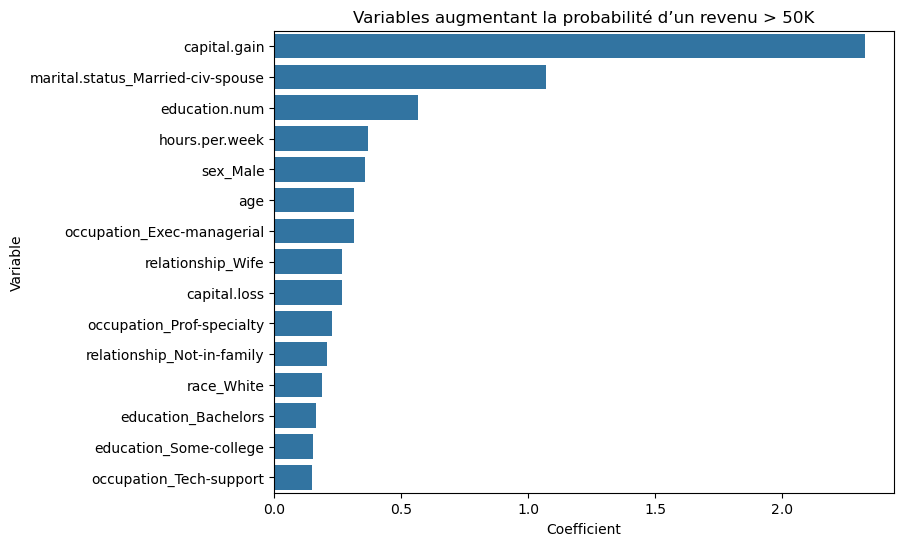

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="coefficient",
    y="feature",
    data=coef_df.head(15)
)
plt.title("Variables augmentant la probabilité d’un revenu > 50K")
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.show()

In [18]:
error_rate = (y_test != y_pred).mean()
error_rate

np.float64(0.14739751266697373)

## Explication du modèle — Régression logistique

### 1. Ce qu’est le modèle

La régression logistique est un modèle de classification binaire qui permet de prédire
la probabilité qu’une observation appartienne à une classe donnée.
Elle combine les variables explicatives de manière linéaire, puis applique une
fonction sigmoïde afin d’obtenir une probabilité comprise entre 0 et 1.
La décision finale est prise en comparant cette probabilité à un seuil, généralement fixé à 0,5.

Dans ce projet, la régression logistique est utilisée pour estimer la probabilité
qu’un individu ait un revenu annuel supérieur à 50K.


### 2. Pourquoi ce modèle a été choisi

La régression logistique a été choisie comme modèle (baseline) pour plusieurs raisons :
- le problème étudié est une classification binaire, parfaitement adaptée à ce modèle ;
- le modèle est simple et interprétable, ce qui facilite l’analyse des résultats ;
- il permet d’obtenir une référence claire pour comparer les performances
  de modèles plus complexes par la suite ;
- il est largement utilisé en pratique comme point de départ en science des données.


### 3. Hypothèses du modèle

La régression logistique repose sur plusieurs hypothèses importantes :
- une relation linéaire entre les variables explicatives et le log-odds de la probabilité prédite ;
- une faible multicolinéarité entre les variables explicatives ;
- une mise à l’échelle des variables numériques afin d’assurer une convergence stable du modèle.

Ces hypothèses justifient les étapes de standardisation et d’analyse de corrélation
réalisées lors du prétraitement et de l’analyse exploratoire.


### 4. Variables les plus importantes (coefficients)

L’importance des variables est évaluée à partir des coefficients du modèle :
- un coefficient positif augmente la probabilité d’un revenu supérieur à 50K ;
- un coefficient négatif la diminue ;
- plus la valeur absolue du coefficient est élevée, plus la variable est influente.

Les résultats montrent que les variables liées au niveau d’éducation, à certaines
occupations et au statut professionnel figurent parmi les plus importantes,
ce qui est cohérent avec les observations issues de l’analyse exploratoire des données.


### 5. Analyse des erreurs du modèle

L’analyse des erreurs met en évidence plusieurs limites du modèle :
- la régression logistique commet davantage d’erreurs sur la classe minoritaire
  (revenu > 50K), ce qui est attendu compte tenu du déséquilibre des classes ;
- le modèle échoue principalement sur des profils intermédiaires,
  dont les caractéristiques sont proches des deux classes ;
- la nature linéaire du modèle limite sa capacité à capturer des relations non linéaires
  et des interactions complexes entre variables.

Ces limites expliquent certaines erreurs de classification observées.


### Conclusion — Régression logistique

La régression logistique constitue une baseline solide et interprétable pour le problème
de classification du revenu. Bien que ses performances soient satisfaisantes,
ses limites justifient l’utilisation de modèles plus complexes capables de capturer
des non-linéarités et des interactions entre variables.